In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:

!unzip '360 Rocks.zip' -d 360_Rocks
dat = '360_Rocks'


Archive:  360 Rocks.zip
replace 360_Rocks/I_Gabbro_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 360_Rocks/I_Gabbro_10.jpg  
  inflating: 360_Rocks/I_Gabbro_12.jpg  
  inflating: 360_Rocks/I_Gabbro_11.jpg  
  inflating: 360_Rocks/I_Granite_01.jpg  
  inflating: 360_Rocks/I_Granite_03.jpg  
  inflating: 360_Rocks/I_Granite_02.jpg  
  inflating: 360_Rocks/I_Granite_04.jpg  
  inflating: 360_Rocks/I_Granite_07.jpg  
  inflating: 360_Rocks/I_Granite_06.jpg  
  inflating: 360_Rocks/I_Granite_05.jpg  
  inflating: 360_Rocks/I_Granite_08.jpg  
  inflating: 360_Rocks/I_Granite_09.jpg  
  inflating: 360_Rocks/I_Granite_11.jpg  
  inflating: 360_Rocks/I_Obsidian_01.jpg  
  inflating: 360_Rocks/I_Obsidian_02.jpg  
  inflating: 360_Rocks/I_Obsidian_04.jpg  
  inflating: 360_Rocks/I_Obsidian_03.jpg  
  inflating: 360_Rocks/I_Obsidian_07.jpg  
  inflating: 360_Rocks/I_Obsidian_05.jpg  
  inflating: 360_Rocks/I_Obsidian_06.jpg  
  inflating: 360_Rocks/I_Obsidian_08.jpg  
  inflating: 3

In [ ]:

image_files = [os.path.join(dat, file) for file in os.listdir(dat) if file.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))]

images = [np.array(Image.open(file).convert('L').resize((64, 64))) for file in image_files]

data = np.array([image.flatten() for image in images])
data


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
print(data.shape)

(360, 4096)


#Question 1

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df = pca.fit_transform(data)

df

array([[ 1.88300214e+03,  2.37392227e+03,  6.73658849e+02, ...,
         4.02084959e+00,  3.04904074e-15,  5.03503635e-13],
       [ 7.51111682e+02, -1.69326113e+03,  1.13964494e+02, ...,
        -1.86617222e+00,  3.04904074e-15,  5.03503635e-13],
       [-1.84245580e+02, -1.79651360e+03, -6.44930754e+02, ...,
        -4.56574871e+00,  3.04904074e-15,  5.03503635e-13],
       ...,
       [ 3.78598999e+03, -7.62354033e+02, -8.81137203e+02, ...,
         3.62312282e+00,  3.04904074e-15,  5.03503635e-13],
       [-1.32052845e+03,  1.14205372e+02,  4.18010594e+02, ...,
         7.26417165e+00,  3.04904074e-15,  5.03503635e-13],
       [ 3.58170184e+03, -1.41324642e+03,  4.04460107e+02, ...,
         2.28364073e+00,  3.04904074e-15,  5.03503635e-13]])

In [ ]:
df.shape

(360, 360)

In [ ]:
variance = np.cumsum(pca.explained_variance_ratio_)
_95_variance = np.argmax(variance >= 0.95) + 1

print("Index of the first principal component that explains at least 95% of the variance:",_95_variance )


Index of the first principal component that explains at least 95% of the variance: 157


#Question 2

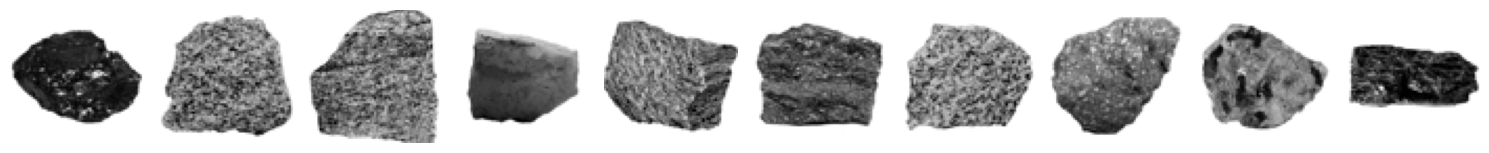

In [ ]:
original_images = images[:10]

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


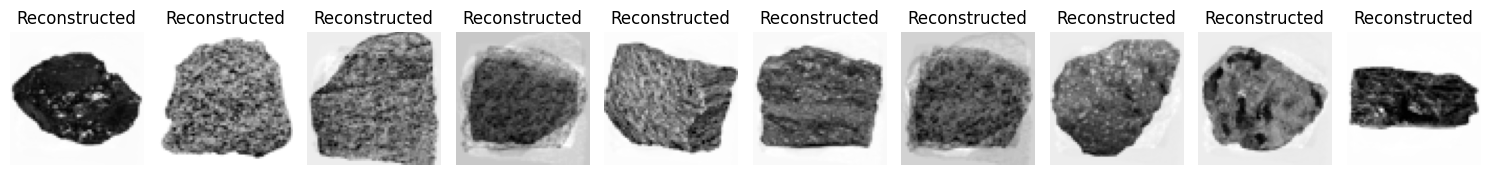

In [ ]:

pca = PCA(n_components=0.95)
reduced_images = pca.fit_transform(data[:10])
reconstructed_images = pca.inverse_transform(reduced_images)

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i].reshape(64, 64), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

#QUESTION 3A

In [ ]:
pca_2 = PCA(n_components=2)
data2 = pca_2.fit_transform(data)

variance_explained = pca_2.explained_variance_ratio_.sum()
print("Explained variance of the first two principal components:", variance_explained)


Explained variance of the first two principal components: 0.3812975555702174


#QUESTION 3B

In [ ]:

data_directory = '360_Rocks'

file_names = os.listdir(data_directory)

categories = [file.split('_')[0] for file in file_names]

print(categories)


['M', 'I', 'M', 'S', 'M', 'M', 'I', 'I', 'I', 'M', 'M', 'I', 'I', 'M', 'S', 'S', 'S', 'M', 'M', 'M', 'I', 'M', 'M', 'I', 'I', 'M', 'I', 'M', 'S', 'M', 'S', 'M', 'S', 'S', 'M', 'I', 'I', 'I', 'I', 'S', 'I', 'M', 'I', 'M', 'S', 'M', 'S', 'I', 'M', 'M', 'I', 'M', 'M', 'M', 'S', 'S', 'S', 'I', 'S', 'M', 'M', 'I', 'I', 'S', 'S', 'M', 'S', 'M', 'S', 'M', 'M', 'M', 'S', 'I', 'S', 'M', 'S', 'M', 'S', 'M', 'M', 'M', 'I', 'I', 'S', 'S', 'S', 'I', 'I', 'M', 'M', 'I', 'M', 'I', 'I', 'I', 'I', 'I', 'M', 'I', 'M', 'I', 'M', 'M', 'S', 'I', 'I', 'I', 'S', 'M', 'S', 'S', 'M', 'M', 'M', 'S', 'S', 'I', 'M', 'I', 'S', 'M', 'S', 'I', 'M', 'I', 'M', 'M', 'S', 'I', 'M', 'S', 'S', 'I', 'S', 'M', 'I', 'I', 'S', 'S', 'M', 'I', 'S', 'I', 'M', 'I', 'M', 'S', 'I', 'M', 'S', 'M', 'S', 'S', 'I', 'S', 'M', 'S', 'M', 'M', 'S', 'M', 'S', 'M', 'S', 'S', 'I', 'S', 'I', 'M', 'M', 'M', 'M', 'M', 'M', 'S', 'I', 'M', 'I', 'S', 'I', 'I', 'M', 'S', 'I', 'S', 'I', 'S', 'S', 'M', 'S', 'M', 'S', 'I', 'I', 'I', 'I', 'S', 'I', 'I',

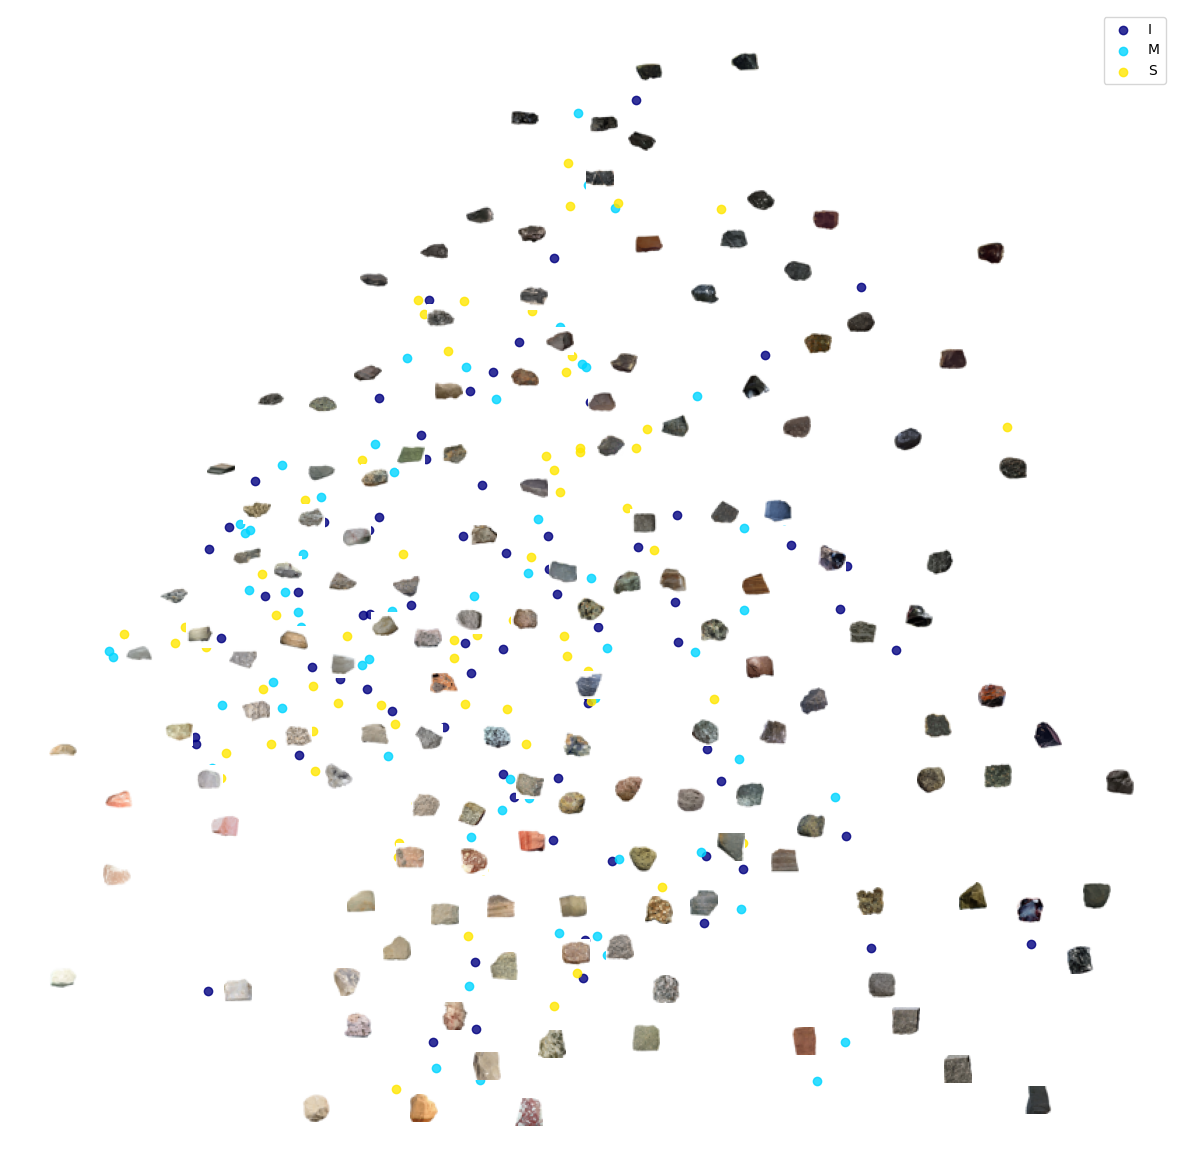

In [ ]:
# PCA

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

X_normalized = MinMaxScaler().fit_transform(data2)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['I', 'M', 'S']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()



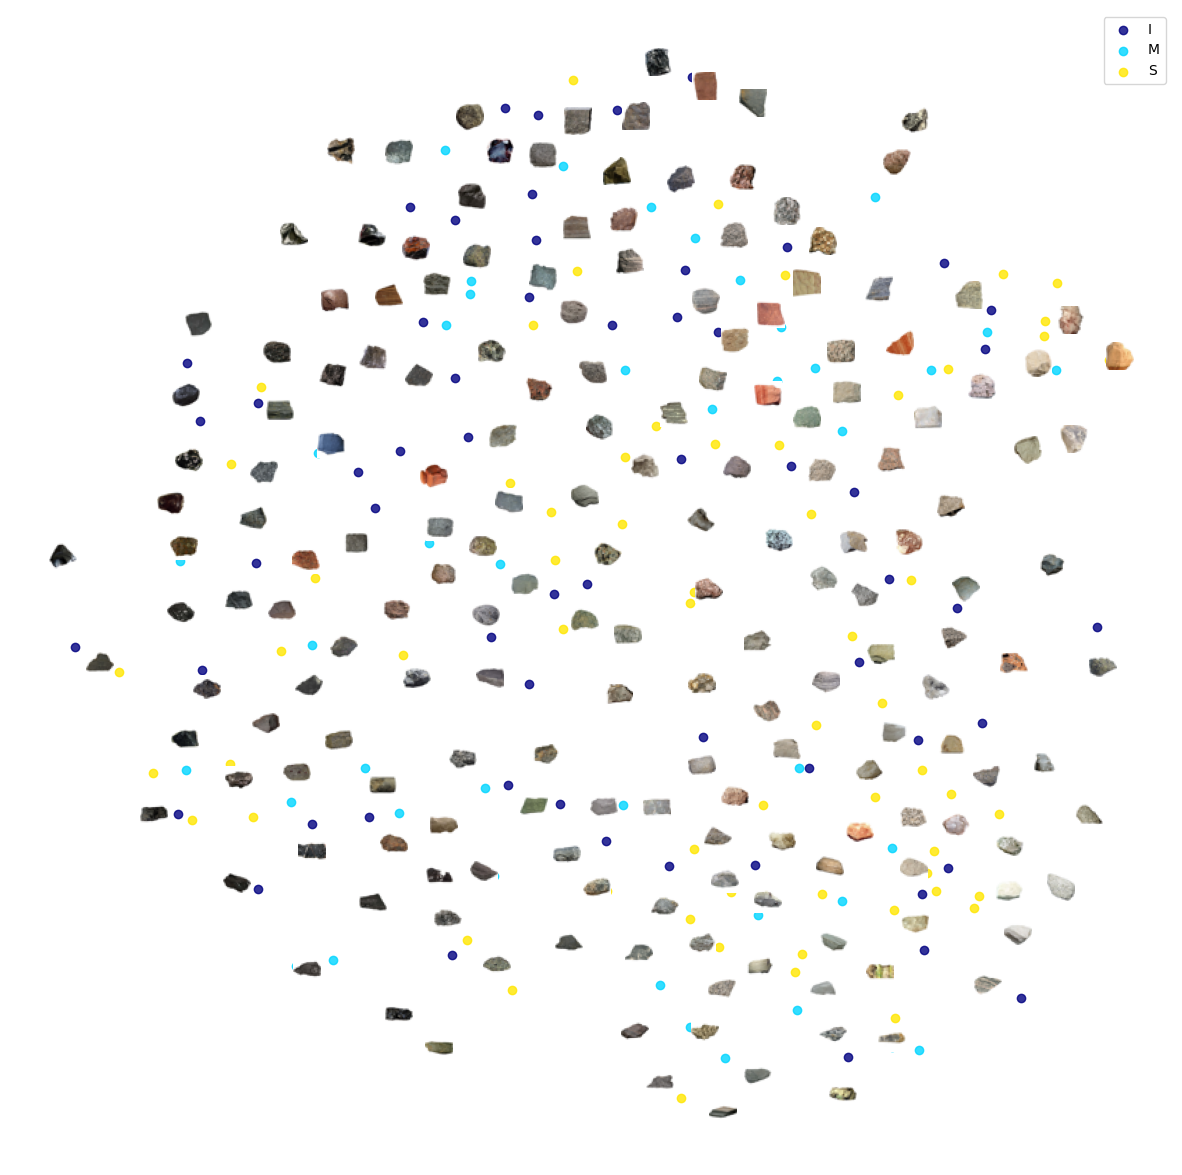

In [ ]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

# t-SNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data)

X_normalized = MinMaxScaler().fit_transform(tsne_data)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['I', 'M', 'S']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()


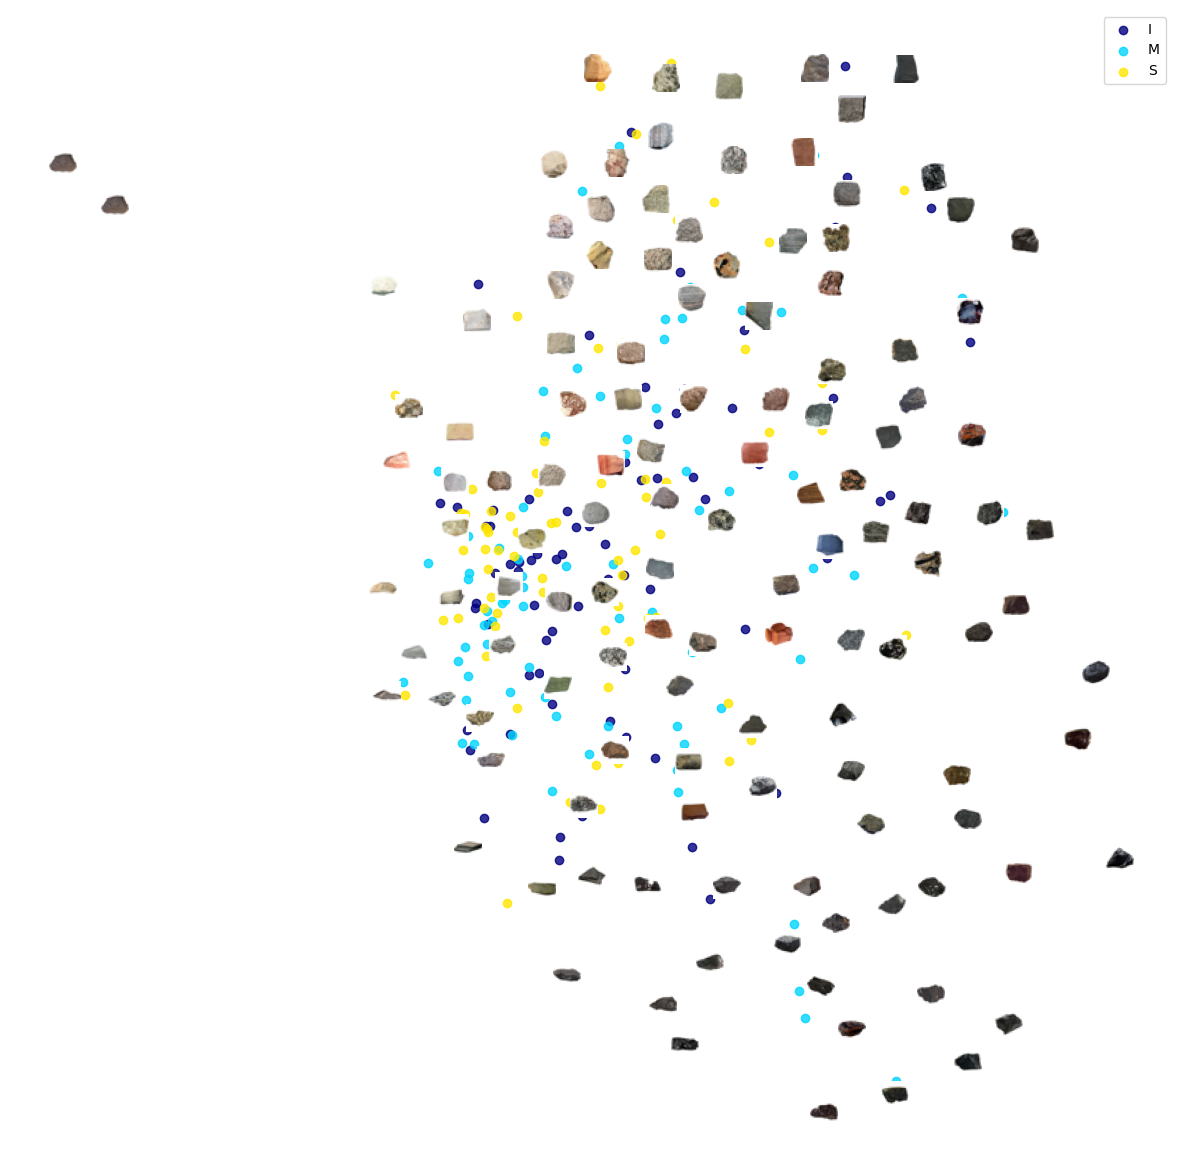

In [ ]:
# LLE

lle = LocallyLinearEmbedding(n_neighbors=30, n_components=2, random_state=42)
lle_data = lle.fit_transform(data)

X_normalized = MinMaxScaler().fit_transform(lle_data)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['I', 'M', 'S']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()

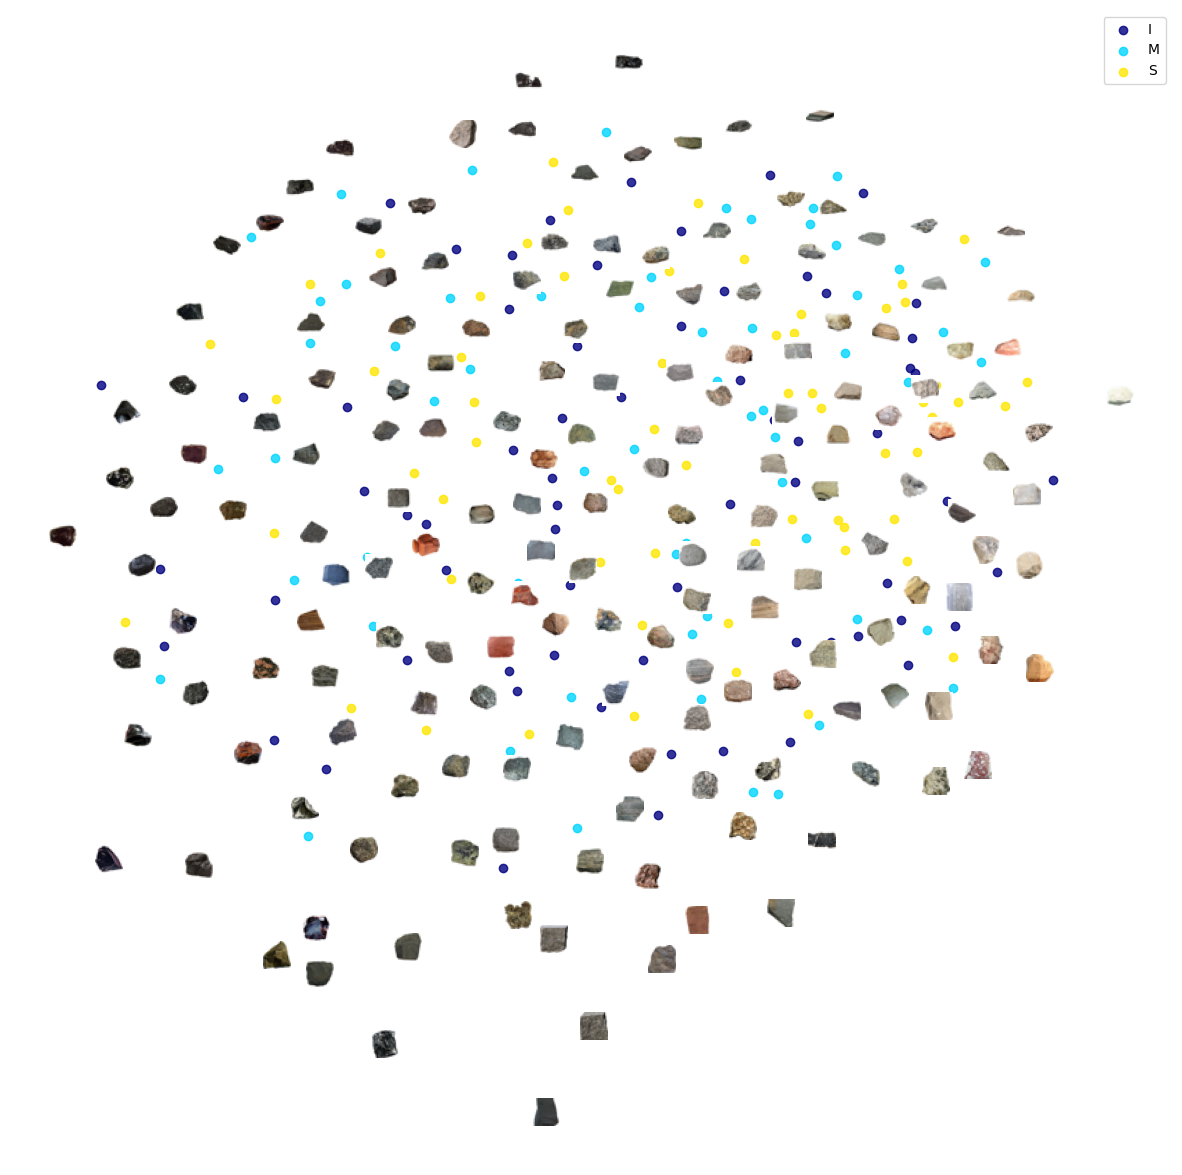

In [ ]:
# MDS

mds = MDS(n_components=2, random_state=42)
mds_data = mds.fit_transform(data)

X_normalized = MinMaxScaler().fit_transform(mds_data)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['I', 'M', 'S']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()

#Question 3C

According to the plots above, the LLE has a lot of overlap. The MDS and t-SNE has scaterred plots out of which the t-SNE  shows a better plot.  t-SNE shows better plot because it provides a better-scattered plot, allowing for more distinct separation of different categories in the data.

#Question 4

In [ ]:
from scipy.spatial import procrustes

human_rankings = np.loadtxt('mds_360.txt')

pca = PCA(n_components=8)
tsne = TSNE(n_components=8, random_state=42, method='exact')
lle = LocallyLinearEmbedding(n_neighbors=30, n_components=8, random_state=42)
mds = MDS(n_components=8, random_state=42)

pca_embed = pca.fit_transform(data)
tsne_embed = tsne.fit_transform(data)
lle_embed = lle.fit_transform(data)
mds_embed = mds.fit_transform(data)

methods = ['PCA', 't-SNE', 'LLE', 'MDS']
embeddings = [pca_embed, tsne_embed, lle_embed, mds_embed]

results = {'Method': [], 'Disparity': []}

for method, embedding in zip(methods, embeddings):
    _, _, disparity = procrustes(human_rankings, embedding)
    results['Method'].append(method)
    results['Disparity'].append(disparity)

results_df = pd.DataFrame(results)

print(results_df)


  Method  Disparity
0    PCA   0.988224
1  t-SNE   0.988060
2    LLE   0.986363
3    MDS   0.986812


In [ ]:

correlations = {'Method': methods}

for i in range(8):
    correlations[f'Corr_{i+1}'] = [np.corrcoef(human_rankings[:, i], embedding[:, i])[0, 1] for embedding in embeddings]


correlations_df = pd.DataFrame(correlations)

print(correlations_df)

  Method    Corr_1    Corr_2    Corr_3    Corr_4    Corr_5    Corr_6  \
0    PCA  0.012569  0.040036 -0.064620  0.079168  0.017082 -0.055196   
1  t-SNE  0.015626  0.034298  0.044510 -0.066080 -0.056575 -0.012988   
2    LLE  0.030850  0.044738  0.017857  0.025524  0.006408  0.013483   
3    MDS  0.009618  0.054177 -0.021208  0.014515  0.019824 -0.020015   

     Corr_7    Corr_8  
0 -0.016557  0.070787  
1  0.075251  0.075691  
2  0.017903 -0.049066  
3 -0.035738  0.028651  


#Question 5A

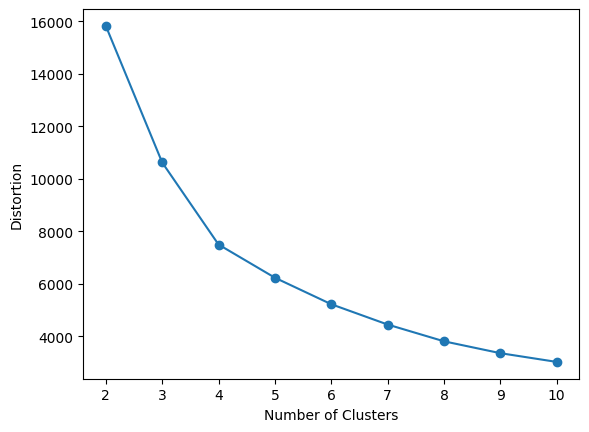

In [ ]:

from sklearn.cluster import KMeans

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()


In [ ]:
diff = np.diff(distortions)
elbow = np.argmin(diff) + 1
elbow + 2

3

We used the elbow method to determine the optimal number of clusters for K-Means clustering. This involves fitting K-Means for different values of k and plotting the distortion (inertia) against the number of clusters.

And calculated the differences in consecutive distortions and identified the "elbow" point as the optimal number of clusters. 3 clusters are optimal for the given dataset.

#Question 5B

In [ ]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                              show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2", alpha=0.3)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')

    if show_centroids:
        centroids = clusterer.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=150, linewidths=3, color='r', zorder=10)


    plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_, cmap='viridis', marker='.', alpha=0.7)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


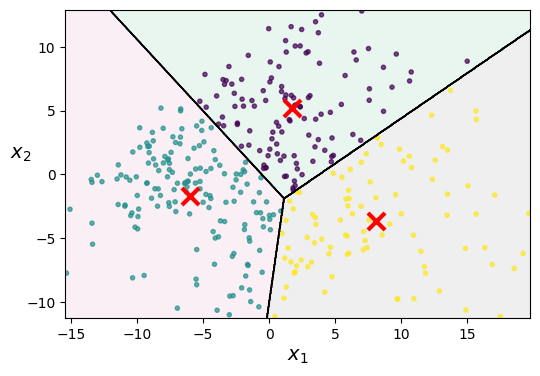

In [ ]:
kmeans = KMeans(n_clusters=3, init="random", n_init=10, random_state=2)
kmeans.fit(pca_data)
plt.figure(figsize=(6, 4))
plot_decision_boundaries(kmeans, pca_data)
plt.show()

#Question 6A

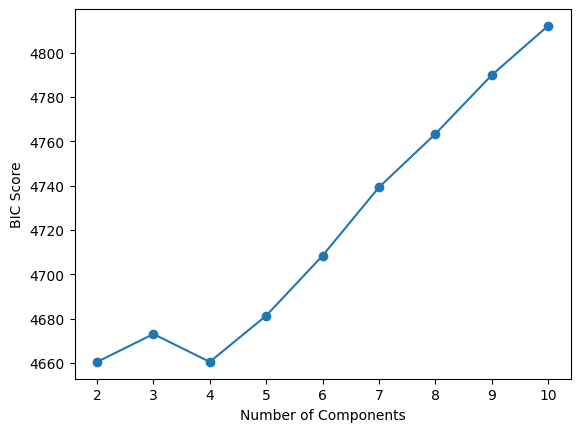

In [ ]:
from sklearn.mixture import GaussianMixture

bic_scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=42)
    gmm.fit(pca_data)
    bic_scores.append(gmm.bic(pca_data))

plt.plot(range(2, 11), bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()


In [ ]:
best = np.argmin(bic_scores) + 2
best

2

We implemented a Gaussian Mixture Model to fit the data for different numbers of components (clusters) ranging from 2 to 10. The Bayesian Information Criterion (BIC) scores were calculated for each model, and a plot is generated to visualize the BIC scores for different numbers of components. Looking at the plot, we can say that both 2 and 4 have minimum BIC score.

Then we identify the number of clusters that minimizes the BIC score, which is considered the best number of clusters. This was done by finding the index of the minimum BIC score and adding 2 (since the loop starts from 2 clusters). Here, the optimal number of clusters is 2.

Therefore, plotting gaussian mixture for both 2 and 4 number of components.

#Question 6B

In [ ]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                              show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2", alpha=0.3)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')

    if show_centroids:
        centroids = clusterer.means_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=150, linewidths=3, color='r', zorder=10)

    plt.scatter(X[:, 0], X[:, 1], c=clusterer.predict(X), cmap='viridis', marker='.', alpha=0.7)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

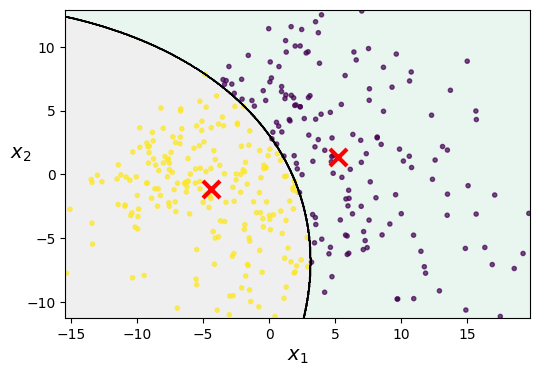

In [ ]:

gmm = GaussianMixture(n_components=2, n_init=10, random_state=42)
gmm.fit(pca_data)

plt.figure(figsize=(6, 4))
plot_decision_boundaries(gmm, pca_data)
plt.show()

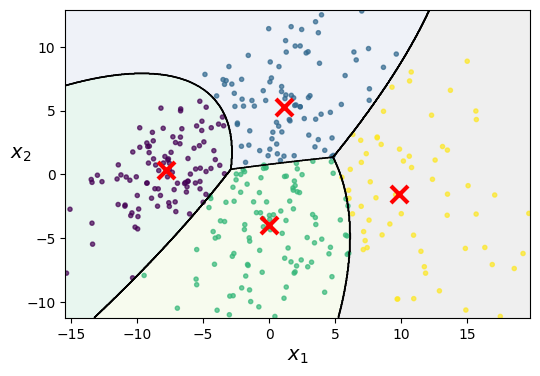

In [ ]:

gmm = GaussianMixture(n_components=4, n_init=10, random_state=42)
gmm.fit(pca_data)

plt.figure(figsize=(6, 4))
plot_decision_boundaries(gmm, pca_data)
plt.show()

#Question 6C

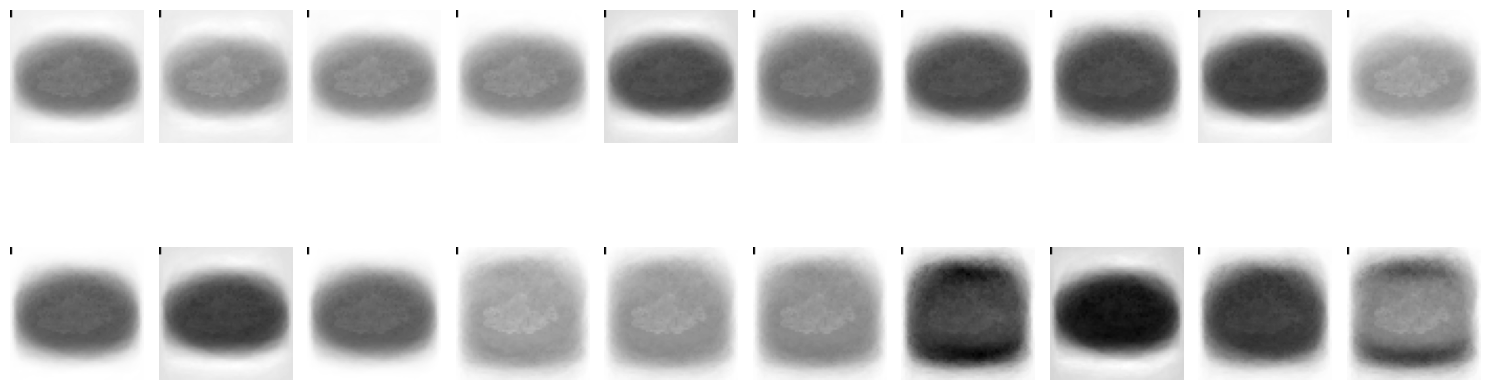

In [ ]:
new_samples = gmm.sample(n_samples=20)[0]

new_samples_original = pca.inverse_transform(new_samples)


plt.figure(figsize=(15, 6))

for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(new_samples_original[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


#Question 7A

In [ ]:
!unzip '120 Rocks.zip' -d 120_Rocks
dat2 = '120_Rocks'

Archive:  120 Rocks.zip
replace 120_Rocks/I_Basalt_2_120.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 120_Rocks/I_Basalt_2_120.jpg  
  inflating: 120_Rocks/I_Diorite_2_120.jpg  
  inflating: 120_Rocks/I_Obsidian_2_120.jpg  
  inflating: 120_Rocks/I_Granite_3_120.jpg  
  inflating: 120_Rocks/I_Granite_4_120.jpg  
  inflating: 120_Rocks/I_Granite_1_120.jpg  
  inflating: 120_Rocks/I_Granite_2_120.jpg  
  inflating: 120_Rocks/I_Gabbro_4_120.jpg  
  inflating: 120_Rocks/I_Gabbro_3_120.jpg  
  inflating: 120_Rocks/I_Gabbro_2_120.jpg  
  inflating: 120_Rocks/I_Diorite_3_120.jpg  
  inflating: 120_Rocks/I_Gabbro_1_120.jpg  
  inflating: 120_Rocks/I_Diorite_4_120.jpg  
  inflating: 120_Rocks/I_Diorite_1_120.jpg  
  inflating: 120_Rocks/I_Basalt_4_120.jpg  
  inflating: 120_Rocks/I_Basalt_3_120.jpg  
  inflating: 120_Rocks/I_Andesite_3_120.jpg  
  inflating: 120_Rocks/I_Andesite_4_120.jpg  
  inflating: 120_Rocks/I_Andesite_2_120.jpg  
  inflating: 120_Rocks/I_Basalt_1_120.jpg  
  

In [ ]:
image_files2 = [os.path.join(dat2, file) for file in os.listdir(dat2) if file.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))]

images2 = [np.array(Image.open(file).convert('L').resize((64, 64))) for file in image_files2]

data_val = np.array([image.flatten() for image in images2])
data_val

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,  93,  89, 110]], dtype=uint8)

In [ ]:
data_val.shape

(120, 4096)

In [ ]:
data_directory = '120_Rocks'

file_names = os.listdir(data_directory)

categories1 = [file.split('_')[0] for file in file_names]

print(categories1)

['M', 'S', 'M', 'S', 'S', 'I', 'I', 'M', 'I', 'I', 'S', 'S', 'M', 'M', 'I', 'S', 'I', 'M', 'I', 'M', 'I', 'M', 'M', 'M', 'M', 'I', 'S', 'I', 'I', 'S', 'M', 'I', 'S', 'I', 'M', 'S', 'S', 'I', 'S', 'S', 'M', 'S', 'M', 'M', 'S', 'I', 'M', 'S', 'M', 'M', 'I', 'I', 'S', 'I', 'M', 'S', 'I', 'M', 'S', 'I', 'M', 'S', 'I', 'I', 'S', 'I', 'I', 'I', 'I', 'M', 'S', 'S', 'I', 'M', 'M', 'S', 'M', 'M', 'M', 'M', 'S', 'S', 'I', 'S', 'S', 'M', 'I', 'M', 'S', 'I', 'M', 'S', 'S', 'I', 'I', 'M', 'M', 'I', 'S', 'M', 'S', 'S', 'S', 'S', 'I', 'M', 'S', 'I', 'S', 'I', 'I', 'S', 'M', 'I', 'I', 'M', 'S', 'M', 'I', 'M']


In [ ]:
df_train = pd.DataFrame(data)
df1_train = pd.DataFrame(data_val)
y1 = pd.DataFrame(categories, columns=['categories'])
y2 = pd.DataFrame(categories1, columns=['categories1'])

In [ ]:
data_train = pd.concat([df_train, y1], axis=1)
data_train

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,categories
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,M
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I
2,255,255,255,255,255,255,255,255,255,255,...,180,182,178,158,181,206,255,255,255,M
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I
356,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I
357,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,M
358,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I


In [ ]:
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]

X_train.shape, y_train.shape

((360, 4096), (360,))

In [ ]:
val_data = pd.concat([df1_train, y2], axis=1)
val_data

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,categories1
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,M
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,M
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,M
116,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S
117,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,M
118,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I


In [ ]:
X_val = val_data.iloc[:,:-1]
y_val = val_data.iloc[:,-1]

X_val.shape, y_val.shape

((120, 4096), (120,))

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

y_train_categorical = keras.utils.to_categorical(y_train_encoded)
y_val_categorical = keras.utils.to_categorical(y_val_encoded)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
import time

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4096)),
    tf.keras.layers.Dense(512, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(256, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(8, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(3, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
start_time = time.time()
history = model.fit(X_train, y_train_categorical, epochs=100,
                    validation_data=(X_val, y_val_categorical),
                    callbacks=[early_stopping])
training_time = time.time() - start_time


print(f"Train time is {training_time} seconds")

Epoch 1/100
12/12 [==============================] - 4s 68ms/step - loss: 2.0597 - accuracy: 0.3389 - val_loss: 8.2759 - val_accuracy: 0.3333
Epoch 2/100
12/12 [==============================] - 0s 37ms/step - loss: 1.9880 - accuracy: 0.3556 - val_loss: 4.4357 - val_accuracy: 0.3333
Epoch 3/100
12/12 [==============================] - 0s 41ms/step - loss: 1.9597 - accuracy: 0.3250 - val_loss: 3.1601 - val_accuracy: 0.3250
Epoch 4/100
12/12 [==============================] - 0s 40ms/step - loss: 1.8441 - accuracy: 0.3028 - val_loss: 1.9097 - val_accuracy: 0.3167
Epoch 5/100
12/12 [==============================] - 0s 38ms/step - loss: 1.8703 - accuracy: 0.3639 - val_loss: 1.3787 - val_accuracy: 0.3500
Epoch 6/100
12/12 [==============================] - 0s 36ms/step - loss: 1.7350 - accuracy: 0.3222 - val_loss: 1.3483 - val_accuracy: 0.3833
Epoch 7/100
12/12 [==============================] - 1s 53ms/step - loss: 1.9850 - accuracy: 0.3333 - val_loss: 1.3310 - val_accuracy: 0.3667
Epoch 

#Question 7B

In [ ]:
valid_loss, valid_accuracy = model.evaluate(X_val, y_val_categorical)
print(f"Validation Loss = {valid_loss}")
print(f"Validation Accuracy = {valid_accuracy}")

4/4 [==============================] - 0s 11ms/step - loss: 1.2561 - accuracy: 0.3667
Validation Loss = 1.256054401397705
Validation Accuracy = 0.36666667461395264


In [ ]:

def get_parameters(model):
    bias = np.sum([np.prod(i.shape) for i in model.trainable_variables if 'bias' in i.name])
    print(f'Total parameters = {model.count_params()}')
    print(f'Total bias parameters = {bias}')

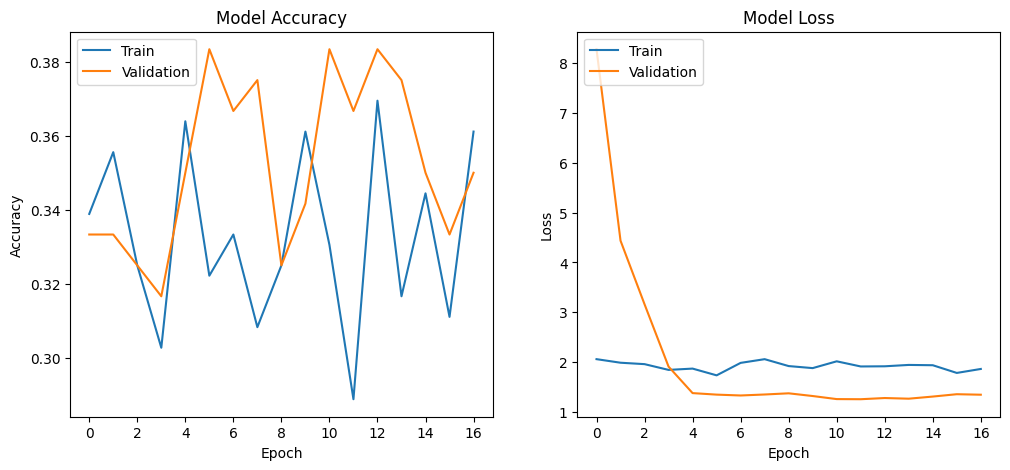

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#Question 7C

In [ ]:
get_parameters(model)

Total parameters = 2266563
Total bias parameters = 907


In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 512)               2097664   
                                                                 
 batch_normalization_32 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_33 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_33 (Dropout)        (None, 256)             

#Question 7D

In [ ]:
from scipy.spatial import procrustes


layer_name = model.layers[-2].name
intermediate_layer = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
train = intermediate_layer.predict(X_train)
val = intermediate_layer.predict(X_val)

human_rankings = np.loadtxt('mds_360.txt')
human_rankings_2 = np.loadtxt('mds_120.txt')

mtx1_train, mtx2_train, train_disparity = procrustes(train, human_rankings )
mtx1_val, mtx2_val, val_disparity = procrustes(val, human_rankings_2)

correlation_df = pd.DataFrame(columns=['Data','D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'Disparity'])
def calculate_correlation(mtx1, mtx2, data,disparity):

    correlation = np.corrcoef(mtx1, mtx2)

    return data,disparity,correlation

data,disparity,dimensions = calculate_correlation(human_rankings,train, "Training",results_df['Disparity'][0])
correlation_df.loc[len(correlation_df.index)] = [data,disparity,dimensions[0,0],dimensions[0,1],dimensions[0,2],dimensions[0,3],dimensions[0,4],dimensions[0,5],dimensions[0,6],dimensions[0,7]]

data,disparity,dimensions = calculate_correlation(human_rankings_2,val, "Validation",results_df['Disparity'][1])
correlation_df.loc[len(correlation_df.index)] = [data,disparity,dimensions[1,0],dimensions[1,1],dimensions[1,2],dimensions[1,3],dimensions[1,4],dimensions[1,5],dimensions[1,6],dimensions[1,7]]


correlation_df.head()

4/4 [==============================] - 0s 14ms/step


,Data,D1,D2,D3,D4,D5,D6,D7,D8,Disparity
0,Training,0.988224,1.000000,0.428542,-0.070319,0.026586,0.045631,0.260818,-0.224954,0.199132
1,Validation,0.988060,0.324682,1.000000,0.734468,0.938082,-0.566556,-0.270435,-0.580648,-0.601115


Conclusion:

The neural network was trained on a dataset with three classes, resulting in a validation accuracy of approximately 36.67%. The model, with a total of 2,266,563 parameters, demonstrated an overfitting pattern as the training accuracy reached 98.82%, while the validation accuracy lagged behind. The validation loss, measuring 1.256, indicated suboptimal performance. Procrustes analysis was applied to assess the alignment of neural activations with human rankings for both training and validation sets. In the training data, neurons exhibited varying degrees of correlation with human rankings, suggesting some alignment with human perception. However, in the validation data, certain neurons displayed poor correlation, indicating a potential limitation in generalization. Further model refinement and regularization techniques may be explored to enhance performance and mitigate overfitting.

The combination of dimensionality reduction, clustering, and neural network modeling revealed important information about the underlying structure of the rock image collection. While each method offered advantages and disadvantages, their combination allowed for a more complete comprehension of the dataset.



References -

1. https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb

2. https://chat.openai.com/

3. https://stats.stackexchange.com/questions/233850/using-pca-on-an-image-dataset-prior-to-classification-with-a-neural-network